In [1]:
"""
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
"""


'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\nimport joblib\nfrom sklearn import tree\n'

In [ ]:
survey_data = pd.read_csv('../data/DataEtafakna.csv')
survey_data.shape
survey_data = survey_data.replace(r'^\s*$', np.nan, regex=True)

#survey_data['age'] = survey_data['age']. fillna(31)
#survey_data = survey_data.astype({"Sexe": str , "Situation ": str})

##Encoding Data##


survey_data['Sexe'] = pd.factorize(survey_data['Sexe'])[0]
survey_data['Situation'] = pd.factorize(survey_data['Situation'])[0]
survey_data['Ville'] = pd.factorize(survey_data['Ville'])[0]
survey_data['Profession'] = pd.factorize(survey_data['Profession'])[0]
survey_data['UtilisateurPotentiel'] = pd.factorize(survey_data['UtilisateurPotentiel'])[0]
survey_data['TypeContrat'] = pd.factorize(survey_data['TypeContrat'])[0]


data_colms = ['age', 'Sexe', 'Situation', 'Ville', 'Profession', 'UtilisateurPotentiel']



survey_data
survey_data.info()

NameError: name 'pd' is not defined

In [ ]:
X = survey_data.drop(columns="TypeContrat")
Y = survey_data["TypeContrat"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1)

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

predictions = model.predict(X_test)

score = accuracy_score(Y_test,predictions)
score

joblib.dump(model,"etafakna.joblib")
score

0.09090909090909091

In [ ]:
modelFinish = joblib.load("etafakna.joblib")

predictions = modelFinish.predict([[21,1,0,3,2,1]])
predictions

/home/yessine/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

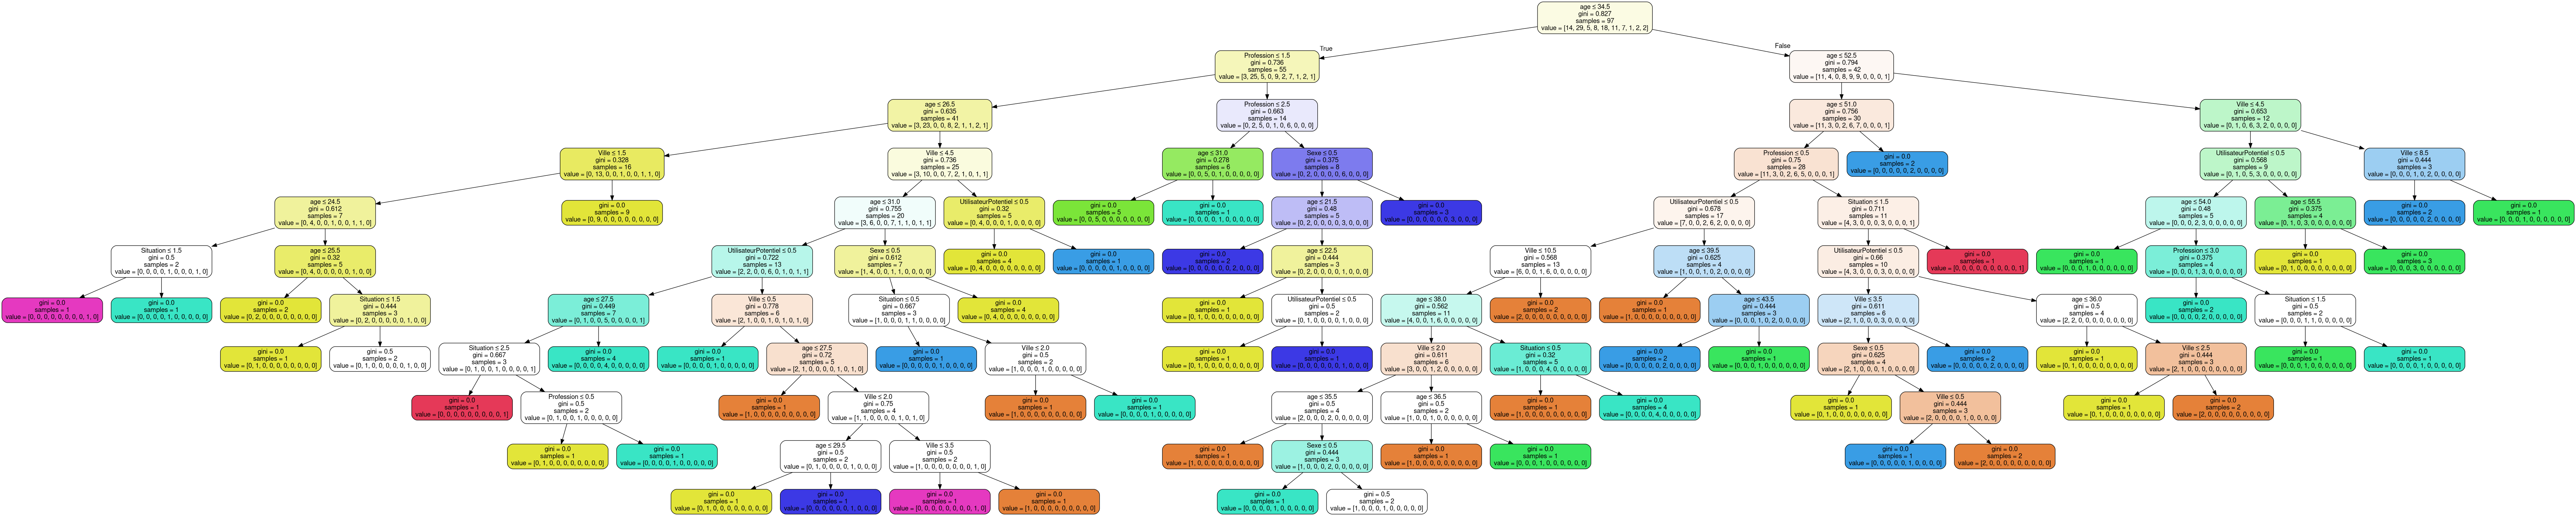

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from io import StringIO
import pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_colms,class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('etafakna.png')
Image(graph.create_png())
